In [1]:
from sympy import *
import sympy
import matplotlib.pyplot as mpl
from IPython.display import display, Math, Latex
import numpy as np
from matplotlib import pyplot as plt
init_printing()
from IPython.display import Markdown as md
! echo $PATH

/Users/harrysmith/anaconda3/bin:/Users/harrysmith/anaconda3/condabin:/usr/bin:/bin:/usr/sbin:/sbin


In [58]:
# Student inputs
lone = 1.4e3
tone = 0.7
ttwo = 1.35
hone = 0.15e3
vone = 125e3
lims = [lone, pi, lone, hone]

# Introduction

The problem assigned is for the thin-walled wing structure

<img src="Fig1.png" width="400">

where we are given the pertinent geometries. 

## Question 1: Second moment of area determination
The first part is to determine the second moment of area - the question does not specify *which* $I$ to determine but from the nature of the question it should be clear that the answer is for the $I_{xx}$. This can be determine for the three different sized members. Members 12 and 34 are trapezoids which will have equal contributions. After finding the expression for the second moment of area of a trapezoid, this is given by the parallel axis theorem

$$I_{xx12}={\frac{l\left(t_1+t_2\right)\left(t_1^2+t_2^2\right)}{48}}+\frac{t_1+t_2}{2}l\left(\frac{h}{2}\right)^2$$

Which the left hand term is of order $t^3$ so can be neglected, giving:

$$I_{xx12} = I_{xx34} = \frac{t_1+t_2}{2}l\left(\frac{h}{2}\right)^2$$

The second moment of area of the semicircular section is identical to that from one of the homeworks - where $I_{xx}=\frac{\pi\,r^3\, t}{2}$. Since this members vertical centroid is at the same location as that of the body, there is no requirement to use the parallel axis theorem:

$$I_{xx23} = \frac{\pi(\frac{h}{2})^3t_1}{2}$$

Finally, the last member is easy to solve:

$$I_{xx41} = \frac{t_2\,h^3}{12}$$

Putting it all together we get the total second moment of area

In [59]:
t_1, t_2, h, l, I_xx = symbols('t_1 t_2 h l I_{xx}')
Ixx12 = (t_1 + t_2)/2*l*(h/2)**2
Ixx34 = Ixx12;
Ixx23 = (pi*(h/2)**3*t_1)/2;
Ixx41 = (t_2*h**3)/12;

pref = 'I_{xx}='
Ixx = simplify(Ixx12 + Ixx23 + Ixx34 + Ixx41)
Ixx2 = Ixx.subs({t_1: tone, t_2: ttwo, h: hone, l:lone})
display(Math('I_{xx12} =' + latex(Ixx12.subs({t_1: tone, t_2: ttwo, h: hone, l:lone}))))
display(Math('I_{xx23} =' + latex(expand(Ixx23.subs({t_1: tone, t_2: ttwo, h: hone, l:lone})).evalf(5))))
display(Math('I_{xx34} =' + latex(Ixx34.subs({t_1: tone, t_2: ttwo, h: hone, l:lone}))))
display(Math('I_{xx41} =' + latex(Ixx41.subs({t_1: tone, t_2: ttwo, h: hone, l:lone}))))
display(Math(pref + latex(Ixx) + ' = ' + latex((Ixx2.evalf(5))) + '(mm)^4 = '  + latex((Ixx2.evalf(5)/10**12)) + 'm^4'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Question 2: Shear flow distribution

This question is asking you to determine the full shear flow distribution - and then asks you to cut member 4-1 along the axis of symmetry. Rather than make that cut, I'll introduce a cut at node 1. Hence the offset $q_0=q_{s1}(0)=q_{s4}=(h)$. The general expression for the basic shear flow is

$$q_b = q_{b}(0) -\frac{V_y}{I_{xx}}\int^{s}_0t(s)y(s)\,\text{d}s$$

Where in the above, $q_{b0}$ is the value at start - so for $q_{b1}$ we know that is it zero since we've made it an open member. Hence for $q_{b1}$ we need the thickness distribution as a function of $s_1$ which is clearly

$$t(s_1) = t_2 - \frac{t_2-t_1}{l}s_1$$

Hence

$$q_{b1} = -\frac{V_y}{I_{xx}}\int^{s_1}_0\left(t_2 - \frac{t_2-t_1}{l}s_1\right)\cdot-\frac{h}{2}\,\text{d}s_1$$

In [60]:
s_1, s_2, s_3, s_4, V_y, theta = symbols('s_1 s_2 s_3 s_4, V_y, theta')
s = [s_1, theta, s_3, s_4]
t = sympy.Matrix([[0], [0], [0], [0]])


t[0] = (t_2 - (t_2 - t_1)/l*s_1)

functb1 = (t_2 - (t_2 - t_1)/l*s_1)*-h/2

qb = [] # Array for the analytical form of the basic shear flow
qb_subs = [] # Array for the version with the student values substituted in
qp = [] # Array for the principle values
qp.append(pi*0) # We know the value at 1 is 0

qb.append(-V_y/Ixx*(integrate(functb1, (s_1, 0, s_1))))
qb_subs.append(qb[0].subs({t_1: tone, t_2: ttwo, h: hone, l:lone, V_y:vone}))

display(Math('q_{b1} = ' + latex(qb[0]) + ' = ' + latex(qb_subs[0].evalf(5))))


<IPython.core.display.Math object>

And the principle value is given by the value fo $q_{b1}$ with $s_1=l$

In [61]:
qp.append(qb_subs[0].subs(s_1, lone))
display(Math('q_{2} = ' + latex(qp[1]) + ' = ' + latex(qp[1].evalf(5))))

<IPython.core.display.Math object>

Similarly, the value of the basic distribution in member 2-3 may now be determined. This is *slightly* more complex, but we went through a very similar example previously. The y-displacement as a function of the angular length along $s_2$ where $s_2=r\theta$ is given by

$$y(\theta)=-r\cdot\cos\theta$$
$\def\dif{\text{d}}$
and if $s_2=r\theta$, then $\text{d}s_2=r\,\dif\theta$, so:

$$q_{b2} = q_2 - \frac{V_y}{I_{xx}}\int^\theta_0t_1\cdot-r\cdot\cos\theta\,r\,\dif\theta$$
$$= q_2 + \frac{V_y\cdot t_1\cdot r^2}{I_{xx}}\int^\theta_0\cos\theta\,\dif\theta$$
$$= q_2 + \frac{V_y\cdot t_1\cdot r^2}{I_{xx}}\left[\sin\theta\right]^\theta_0$$
$$= q_2 + \frac{V_y\cdot t_1\cdot r^2}{I_{xx}}\sin\theta$$

Seeing that $r$ is the radius of the semi-circle and hence equal to half the sectional height.

$$= q_2 + \frac{V_y\cdot t_1\cdot h^2}{4\cdot I_{xx}}\sin\theta$$

In [62]:
theta = symbols('theta')
t[1] = t_1
qb.append(qp[1] + V_y*t_1*h**2/4/Ixx*sin(theta))
qb_subs.append(qb[1].subs({t_1: tone, t_2: ttwo, h: hone, l:lone, V_y:vone}))
display(Math('q_{b2} = ' + latex(qb[1]) + ' = ' + latex(qb_subs[1].evalf(5))))

<IPython.core.display.Math object>

With the principal value being given by $q_{b2}$ with $\theta = \pi$

In [63]:
qp.append(qb_subs[1].subs(theta, pi))
display(Math('q_{3} = ' + latex(qp[2]) + ' = ' + latex(qp[2].evalf(5))))

<IPython.core.display.Math object>

Repeating the exercise for s3:

$$q_{b3} = q_3 -\frac{V_y}{I_{xx}}\int^{s_3}_0t(s_3)y(s_3)\,\dif s_3$$

And we have the thickess as a function of $s_3$ as $t(s_3) = t_1 + \frac{t_2 - t1}{l}s_3$, and the vertical displacement as a constant $\frac{h}{2}$ hence the basic shear flow distribution as

In [64]:
functb3 = (t_1 + (t_2 - t_1)/l*s_3)*h/2
t[2] = t_1 + (t_2 - t_1)/l*s_3
qb.append(qp[2] + -V_y/Ixx*(integrate(functb3, (s_3, 0, s_3))))

qb_subs.append(qb[2].subs({t_1: tone, t_2: ttwo, h: hone, l:lone, V_y:vone}))

display(Math('q_{b3} = ' + latex(qb[2]) + ' = ' + latex(qb_subs[2].evalf(5))))

qp.append(qb_subs[2].subs(s_3, lone))

display(Math('q_{4} = ' + latex(qp[3]) + ' = ' + latex(qp[3].evalf(5))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Repeating the exercise for s4:

$$q_{b4} = q_4 -\frac{V_y}{I_{xx}}\int^{s_4}_0t(s_4)y(s_4)\,\dif s_3$$

And we have the thickess as a constant $t_2$, and the vertical displacement as a function of $s_4$ is $y(s_4)=\frac{h}{2}-s_4$. Hence the basic shear flow distribution as

In [65]:
functb3 = t_2*(h/2-s_4)
t[3] = t_2

qb.append(qp[3] -V_y/Ixx*(integrate(functb3, (s_4, 0, s_4))))

qb_subs.append(qb[3].subs({t_1: tone, t_2: ttwo, h: hone, l:lone, V_y:vone}))

display(Math('q_{b4} = ' + latex(qb[3]) + ' = ' + latex(qb_subs[3].evalf(5))))

qp.append(qb_subs[3].subs(s_4, hone))
display(Math('q_{1} = ' + latex(qp[4]) + ' = ' + latex(qp[4].evalf(5))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Which has given us the four *basic* shear flow distributions:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

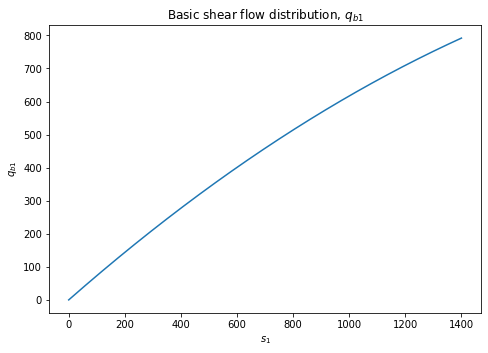

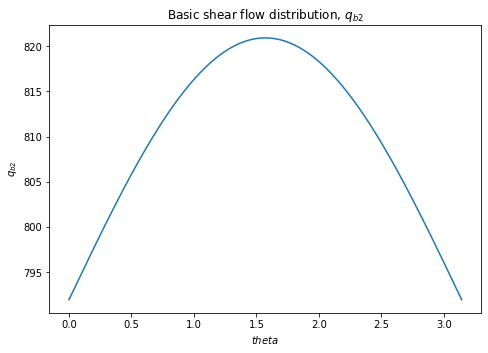

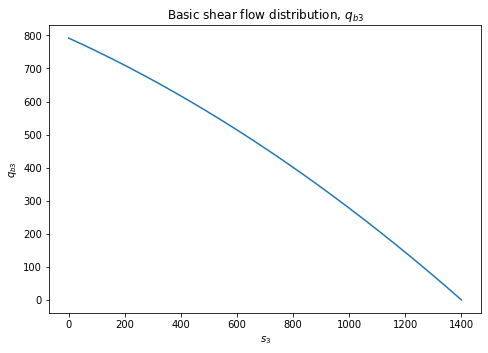

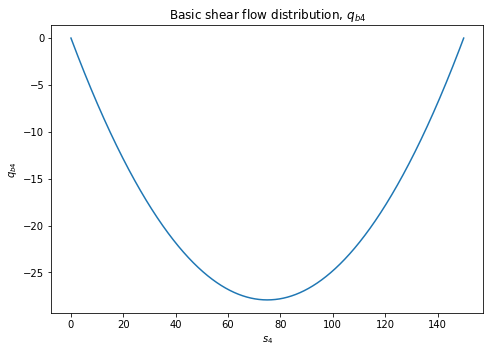

In [66]:
# S = symbols('S')
for i in range(0, 4):
    display(Math('q_{b' + str(i+1) + '} = ' + latex(qb[i]) + ' = ' + latex(qb_subs[i].evalf(5))))
    svect = np.linspace(0, float(lims[i]), int(1e5))

    qbfun = lambdify((s[i],), qb_subs[i], modules=['numpy'])
    x_vals = svect
    y_vals = qbfun(svect)
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.plot(x_vals, y_vals)
    plt.title('Basic shear flow distribution, $q_{b%i}$' %(i+1))
    if i == 1:
        plt.xlabel('$theta$')
    else:
        plt.xlabel('$s_%i$' %(i+1))    
    plt.ylabel('$q_{b%i}$' %(i+1))
    

With the principal values given by:

In [67]:
for i in range(0, 5):
    if i < 4:
        display(Math('q_' + str(i+1) + ' = ' + latex(qp[i]) + ' = '  + latex(qp[i].evalf(5))))
    else:
        display(Math('q_5 = q_' + str(i-3) + ' = ' + latex(qp[i]) + ' = '  + latex(qp[i].evalf(5))))
            



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Now we have the basic value of the distribution, the offset can be determined from
$$q_0 = -\frac{\int^s_0\frac{q_b}{G\,t}\,\dif s}{\int^s_0\frac{1}{G\,t}\,\dif s}$$

Which for this problem is the same as:

$$q_0 = -\frac{\displaystyle\sum^4_{i=1}\displaystyle\int^{s_i}_0\frac{q_{b_i}}{t(s_i)}\,\dif s_i}{\displaystyle\sum^4_{i=1}\displaystyle\int^{si}_0\frac{1}{t(s_i)}\,\dif s_i}$$

In [68]:
num = [];
den = [];


for i in range(0, 4):
#     print(t[i])
    a, b = div(qb_subs[i],t[i].subs({t_1:tone, t_2:ttwo, l:lone}))
    
    if a == 0:
        qbfunct = b
    else:
        qbfunct = a        
#     print(s[i])
#     print(qbfunct)
#     print(lims[i])
#     print('\n')
    num.append(integrate(qbfunct, (s[i], 0, lims[i])))
    den.append(integrate(1/t[i].subs({t_1:tone, t_2:ttwo, l:lone}), (s[i], 0, lims[i])))



q0 = -sum(num)/sum(den)

display(Math('q_0 = ' + latex(q0) + ' = '  + latex(q0.evalf(5))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

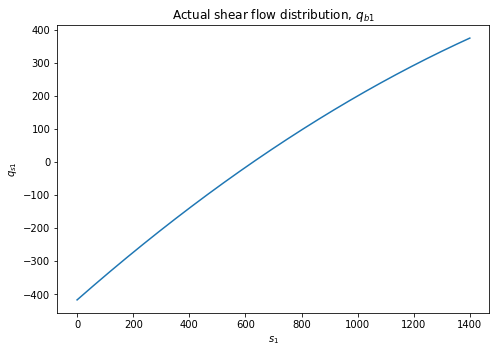

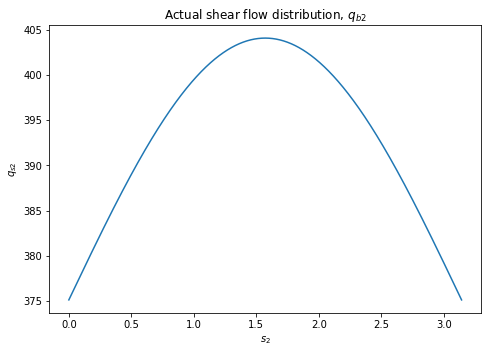

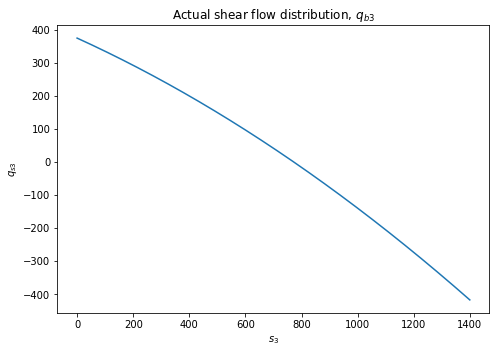

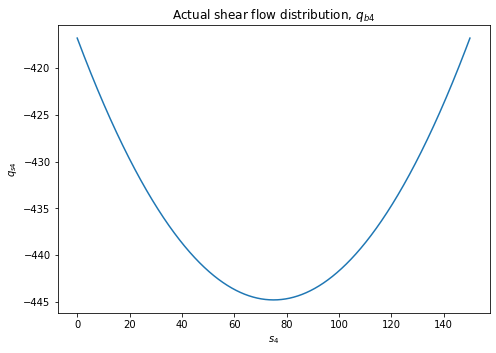

In [69]:
qs = []
for i in range(0, 4):
    qs.append(q0 + qb_subs[i])
    display(Math('q_{s' + str(i+1) + '} = '  + latex(qs[i].evalf(5))))
    svect = np.linspace(0, float(lims[i]), int(1e5))

    qbfun = lambdify((s[i],), qs[i], modules=['numpy'])
    x_vals = svect
    y_vals = qbfun(svect)
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.plot(x_vals, y_vals)
    plt.title('Actual shear flow distribution, $q_{b%i}$' %(i+1))
    plt.xlabel('$s_%i$' %(i+1))
    plt.ylabel('$q_{s%i}$' %(i+1))

## Question 3: Shear centre determination

Now we can determine the shear centre by setting the moments due to shear flow and that due to the shear force equal to zero. Remember that this condition is *always* true for a closed section, BUT - we've determined the shear flow distribution due to *any* vertical force on the section. We now can determine the moment which is dependent on $\zeta$. This will only be equal to the shear flow moment if the load is applied at the shear centre. We can try this for two different moment points.

We can show that the answer is the same wherever moments are taken about.

<img src="Fig1.png" width="400">

Choosing, initially, to take moments about node 3. This means that we need to look at the moments produced by $q_{s1}$, $q_{s2}$, and $q_{s4}$. We used a semi-circular arc before - we can adapt the methodology for this question

<img src="SemiCircularArc.jpg" width="200">

The moment at $B$ due to the shear force $q_s$ will be the integrated component of $q_s$ normal to the line $l$, multiplied by the moment arm, $l$. From basic circle theory, the angle made by the tangent to the circle (that is, the line $q_s(\theta)$) will be $\frac{\theta}{2}$, and the length $l$ will be $2\cdot r\cdot\cos\frac{\theta}{2}$. The moment along $s_2$ per unit length is therefore

$$\frac{\dif M^q_B}{\dif{s_2}} = l\cdot q_{s_2}\cdot\cos\frac{\theta}{2} = 2\cdot r\cdot\cos\frac{\theta}{2}\cdot q_{s_2}\cdot\cos\frac{\theta}{2}$$
$$= 2\cdot q_{s_2}\cdot r\cdot\frac{1 + \cos\frac{\theta}{2}}{2} = q_{s_2}\left(r + r\cdot\cos\theta\right)$$
$$= q_{s_2}\frac{1}{2}\left(h + h\cdot\cos\theta\right)$$

Which we integrate along $s_2$ to get the total moment at $B$. Since the expression above is a function of $\theta$ and not $s_2$ we substitute the variable of integration by recalling that $s = r\theta, \rightarrow \dif s=r\,\dif \theta$

$$ M^q_{s_2} = \int^\pi_0q_{s_2}\frac{1}{2}\left(h + h\cdot\cos\theta\right)\frac{h}{2}\,\dif \theta$$
$$  = \int^\pi_0q_{s_2}\frac{1}{4}\left(h + h\cdot\cos\theta\right)h\,\dif \theta$$

In [70]:
mqf = qs[1]/4*(h + h*cos(theta))*h
mqf = mqf.subs({t_1: tone, t_2: ttwo, h: hone, l:lone, V_y:vone})
display(mqf.evalf(5))
Mq2_3 = integrate(mqf.evalf(5), (theta, 0, pi))
display(Math('M^{q_2}_3 = ' + latex(Mq2_3.evalf(5)) + 'Nmm'))

<IPython.core.display.Math object>

The moments due to $q_{s1}$ and $q_{s4}$ are easier to determine.

$$M_{3}^{q_1} = h\int^{l}_0 q_{s_1}\dif s_1$$
$$M_{3}^{q_4} = l\int^{h}_0 q_{s_4}\dif s_4$$

The total moments due to shear flow are simply the invidivual contributions added together.

In [71]:
Mq1_3 = hone*integrate(qs[0], (s_1, 0, lone))
display(Math('M^{q_1}_3 = ' + latex(Mq1_3.evalf(5)) + 'Nmm'))
Mq4_3 = lone*integrate(qs[3], (s_4, 0, hone))
display(Math('M^{q_4}_3 = ' + latex(Mq4_3.evalf(5)) + 'Nmm'))
Mq3 = Mq2_3 + Mq1_3 + Mq4_3
Mq3 = Mq3.subs({t_1: tone, t_2: ttwo, h: hone, l:lone, V_y:vone})
display(Math('\sum M^{q}_3 = ' + latex(Mq3.evalf(5)) + 'Nmm'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The moment due to the applied shear force will be counter-clockwise and hence negative
$$M^V = -\zeta\cdot V_Y=\sum M^q$$
$$\rightarrow \zeta = -\frac{\sum M^q}{V_Y}$$

In [72]:
zeta = symbols('zeta')
zeta = -Mq3/vone
display(Math('\zeta = ' + latex(zeta.evalf(5)) + 'mm'))

<IPython.core.display.Math object>

## Question 4: Infinitessimal cut along symmetry line of member 4-1

This gives us an additional member. I have arbitrarily decided to re-number the shear flows according to the diagram below. This may be different to what you chose, but is sensible as it keeps the procedure the same. We will have to recalculate the shear flows - but now we can use the 'basic' expression as there is no offset to determine.

<img src="DistforQ4.png" width="400">

Hence all that needs to be determined that is *new* are the displacement from the centroid as a function of $s_5$. These are simple to determine. The procedure for determining the shear flows is the same as before. The nomenclature has been updated below to have uppercase Q as the shear flow. (This forced me to re-write and ensure that I wasn't using old values - a lesson for good practice).

## Determining the new shear flows

In [73]:
s_5 = symbols('s_5')
t = sympy.Matrix([[t[3]], [t[0]], [t[1]], [t[2]], [t[3]]])

In [74]:
# Resetting the arrays
Qs = [] # Array for the analytical form of the open shear flow
Qs_subs = [] # Array for the version with the student values substituted in
Qp = [] # Array for the principle values
Qp.append(0) # We know the value at node 5 is 0

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#%% Member 1
# The y displacement as a function of s5 is
functb1 = -s_1

Qs.append(-V_y/Ixx*(integrate(functb1*t_2, (s_1, 0, s_1))))
Qs_subs.append(Qs[0].subs({t_1: tone, t_2: ttwo, h: hone, l:lone, V_y:vone}))

display(Math('q_{s1} = ' + latex(Qs[0]) + ' = ' + latex(Qs_subs[0].evalf(5))))

# Principal value
Qp.append(Qs_subs[0].subs(s_1, hone/2))


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#%% Member 2 (Old member 1)
functb2 = (t_2 - (t_2 - t_1)/l*s_2)*-h/2
Qs.append(Qp[1] + -V_y/Ixx*(integrate(functb2, (s_2, 0, s_2))))
Qs_subs.append(Qs[1].subs({t_1: tone, t_2: ttwo, h: hone, l:lone, V_y:vone}))

# Principal value
Qp.append(Qs_subs[1].subs(s_2, lone))


display(Math('q_{s2} = ' + latex(Qs[1]) + ' = ' + latex(Qs_subs[1].evalf(5))))

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#%% Member 3 (Old member 2)
Qs.append(Qp[2] + -V_y*t_1*h**2/4/Ixx*sin(theta))
Qs_subs.append(Qs[2].subs({t_1: tone, t_2: ttwo, h: hone, l:lone, V_y:vone}))
display(Math('q_{s3} = ' + latex(Qs[2]) + ' = ' + latex(Qs_subs[2].evalf(5))))
# Principal value
Qp.append(Qs_subs[2].subs(theta, pi))

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#%% Member 4 (old member 3)
functb4 = (t_1 + (t_2 - t_1)/l*s_4)*h/2
Qs.append(Qp[3] + -V_y/Ixx*(integrate(functb4, (s_4, 0, s_4))))
Qs_subs.append(Qs[3].subs({t_1: tone, t_2: ttwo, h: hone, l:lone, V_y:vone}))

display(Math('q_{s4} = ' + latex(Qs[3]) + ' = ' + latex(Qs_subs[3].evalf(5))))

Qp.append(Qs_subs[3].subs(s_4, lone))



#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#%% Member 5 (half of old member 4)
functb5 = h/2 - s_5
Qs.append(Qp[4] + -V_y/Ixx*(integrate(functb5*t_2, (s_5, 0, s_5))))
Qs_subs.append(Qs[4].subs({t_1: tone, t_2: ttwo, h: hone, l:lone, V_y:vone}))

display(Math('q_{s5} = ' + latex(Qs[4]) + ' = ' + latex(Qs_subs[4].evalf(5))))

Qp.append(Qs_subs[4].subs(s_5, hone/2))






# Display the principal values

print("With the principal values as:")
display(Math('q_{0} = ' + latex(Qp[0])))
display(Math('q_{1} = ' + latex(Qp[1]) + ' = ' + latex(Qp[1].evalf(5))))
display(Math('q_{2} = ' + latex(Qp[2]) + ' = ' + latex(Qp[2].evalf(5))))
display(Math('q_{3} = ' + latex(Qp[3]) + ' = ' + latex(Qp[3].evalf(5))))
display(Math('q_{4} = ' + latex(Qp[4]) + ' = ' + latex(Qp[4].evalf(5))))
display(Math('q_{5} = ' + latex(Qp[5]) + ' = ' + latex(Qp[5].evalf(5))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

With the principal values as:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Shear centre determination

With the shear flows now determined, the shear centre can be determined as it was before. We will take moments about the upper LH corner - the upper end of the circular arc. The expression for the circular arc is unchanged except now it is $s_3$ in plcae of $s_2$ due to the split at 4-1:

$$ M^q_{s_3} = \int^\pi_0q_{s_2}\frac{1}{2}\left(h + h\cdot\cos\theta\right)\frac{h}{2}\,\dif \theta$$
$$  = \int^\pi_0q_{s_3}\frac{1}{4}\left(h + h\cdot\cos\theta\right)h\,\dif \theta$$

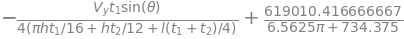

<IPython.core.display.Math object>

In [75]:
Mqf = Qs[2]/4*(h + h*cos(theta))*h
display(Qs[2])
Mqf = Mqf.subs({t_1: tone, t_2: ttwo, h: hone, l:lone, V_y:vone})
display(Mqf.evalf(5))
Mq3_3 = integrate(Mqf.evalf(5), (theta, 0, pi))
display(Math('M^{q_3}_3 = ' + latex(Mq3_3.evalf(5)) + 'Nmm'))

We will determine the shear flows at node 3 due to $q_{s1}$, $q_{s2}$, and $q_{s5}$, and then summate to give the total shear flow moment at node 3.

In [76]:
Mq1_3 = lone*integrate(Qs[0], (s_1, 0, hone/2))
display(Math('M^{q_1}_3 = ' + latex(Mq1_3.evalf(5)) + 'Nmm'))
Mq2_3 = hone*integrate(Qs[1], (s_2, 0, lone))
display(Math('M^{q_2}_3 = ' + latex(Mq4_3.evalf(5)) + 'Nmm'))
Mq5_3 = lone*integrate(Qs[4], (s_5, 0, hone/2))
display(Math('M^{q_5}_3 = ' + latex(Mq4_3.evalf(5)) + 'Nmm'))
Mq3 = Mq3_3 + Mq1_3 + Mq2_3 + Mq5_3
Mq3 = Mq3.subs({t_1: tone, t_2: ttwo, h: hone, l:lone, V_y:vone})
display(Math('\sum M^{q}_3 = ' + latex(Mq3.evalf(5)) + 'Nmm'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

And, as n before, the moment due to the applied shear force will be counter-clockwise and hence negative
$$M^V = -\zeta\cdot V_Y=\sum M^q$$
$$\rightarrow \zeta = -\frac{\sum M^q}{V_Y}$$

In [77]:
zeta = symbols('zeta')
zeta = -Mq3/vone
display(Math('\zeta = ' + latex(zeta.evalf(5)) + 'mm'))

<IPython.core.display.Math object>

## Comment on the answer to part 4

What we see here is that we have a *negative value*, and we can subtract the circular radius from it to show that the shear centre lies to the left of the closed section 

In [78]:
dX = -(zeta + hone/2)

display("With the infinitessimal cut, the shear centre now lies outisde of the section, to the left by " + latex(dX.evalf(3)/1000) + "m")

'With the infinitessimal cut, the shear centre now lies outisde of the section, to the left by 0.837m'

This is a large value, but the fact that it's outside of the section makes sense. Looking back at the examples in the notes, we see that for an open section, the shear centre lies outside to the closed side:

<img src="ShearCentreExample3.jpg" width="400">

## 6 - Removing 4-1 completely

<img src="DistforQ6.png" width="400">


We've actually done all the hard work at this point, but we need to realise that the value for the second moment of area will be reduced to:

In [79]:
pref = 'I_{xx}='
Ixxprime = simplify(Ixx12 + Ixx23 + Ixx34)
Ixx2 = Ixxprime.subs({t_1: tone, t_2: ttwo, h: hone, l:lone})

display(Math(pref + latex(Ixx) + ' = ' + latex((Ixx2.evalf(5))) + '(mm)^4 = '  + latex((Ixx2.evalf(5)/10**12)) + 'm^4'))

<IPython.core.display.Math object>

So we will re-evaluate the shear flows in the three members, using the numbering system from the diagram above

In [80]:
# Resetting the arrays
Qs = [] # Array for the analytical form of the open shear flow
Qs_subs = [] # Array for the version with the student values substituted in
Qp = [] # Array for the principle values
Qp.append(0) # We know the value at node 5 is 0

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#%% Member 1 (Original member 1, Amended member 2)
functb1 = (t_2 - (t_2 - t_1)/l*s_1)*-h/2
Qs.append(-V_y/Ixx*(integrate(functb1, (s_1, 0, s_1))))
Qs_subs.append(Qs[0].subs({t_1: tone, t_2: ttwo, h: hone, l:lone, V_y:vone}))

# Principal value
Qp.append(Qs_subs[0].subs(s_1, lone))

display(Math('q_{s1} = ' + latex(Qs[0]) + ' = ' + latex(Qs_subs[0].evalf(5))))

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#%% Member 2 (Original member 2, amended member 3)
Qs.append(Qp[1] + -V_y*t_1*h**2/4/Ixx*sin(theta))
Qs_subs.append(Qs[1].subs({t_1: tone, t_2: ttwo, h: hone, l:lone, V_y:vone}))
display(Math('q_{s2} = ' + latex(Qs[1]) + ' = ' + latex(Qs_subs[1].evalf(5))))
# Principal value
Qp.append(Qs_subs[1].subs(theta, pi))

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#%% Member 3 (Original member 3, amended member 4)
functb3 = (t_1 + (t_2 - t_1)/l*s_3)*h/2
Qs.append(Qp[2] + -V_y/Ixx*(integrate(functb3, (s_3, 0, s_3))))
Qs_subs.append(Qs[2].subs({t_1: tone, t_2: ttwo, h: hone, l:lone, V_y:vone}))

display(Math('q_{s3} = ' + latex(Qs[2]) + ' = ' + latex(Qs_subs[2].evalf(5))))

Qp.append(Qs_subs[2].subs(s_3, lone))



# Display the principal values

print("With the principal values as:")
display(Math('q_{0} = ' + latex(Qp[0])))
display(Math('q_{1} = ' + latex(Qp[1]) + ' = ' + latex(Qp[1].evalf(5))))
display(Math('q_{2} = ' + latex(Qp[2]) + ' = ' + latex(Qp[2].evalf(5))))
display(Math('q_{3} = ' + latex(Qp[3]) + ' = ' + latex(Qp[3].evalf(5))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

With the principal values as:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

By this point, we're experts in determining the shear centre location, so the calculations can just be repeated here with the new values of the shear flows

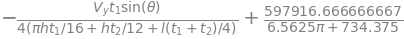

<IPython.core.display.Math object>

In [81]:
Mqf = Qs[1]/4*(h + h*cos(theta))*h
display(Qs[1])
Mqf = Mqf.subs({t_1: tone, t_2: ttwo, h: hone, l:lone, V_y:vone})
display(Mqf.evalf(5))
Mq2_3 = integrate(Mqf.evalf(5), (theta, 0, pi))
display(Math('M^{q_3}_3 = ' + latex(Mq3_3.evalf(5)) + 'Nmm'))

In [82]:
Mq1_3 = hone*integrate(Qs[0], (s_1, 0, lone))
display(Math('M^{q_1}_3 = ' + latex(Mq1_3.evalf(5)) + 'Nmm'))

Mq3 = Mq1_3 + Mq2_3
Mq3 = Mq3.subs({t_1: tone, t_2: ttwo, h: hone, l:lone, V_y:vone})
display(Math('\sum M^{q}_3 = ' + latex(Mq3.evalf(5)) + 'Nmm'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [83]:
zeta = symbols('zeta')
zeta = -Mq3/vone
display(Math('\zeta = ' + latex(zeta.evalf(5)) + 'mm'))

<IPython.core.display.Math object>

In [84]:
dX = -(zeta + hone/2)

display("With member 4-1 removed, the shear centre now lies outisde of the section, to the left by " + latex(dX.evalf(3)/1000) + "m")

'With member 4-1 removed, the shear centre now lies outisde of the section, to the left by 0.77m'